In [1]:
from tifffile import TiffFile
import os
import numpy as np
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import utilities as rocku
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd

In [2]:
# %matplotlib notebook
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [54]:
# need to change
ipts="23768"
# scan_type = 'ct_scans'
scan_type = 'radiographs'
# scan_type = 'alignment_calibration'

In [82]:
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/" + scan_type
sorted(os.listdir(scan_loc))

['06_29_21_OB',
 '06_29_21_dark_field',
 '2021_02_25',
 '2021_03_25',
 '2021_04_12',
 '2021_04_14',
 '2021_04_15',
 '2021_04_18_resolution',
 '2021_04_22_25um_scint',
 '2021_04_22_BN_PLA',
 '2021_04_27_light',
 '2021_05_25',
 '2021_07_07_Cu_fastCT',
 '2021_07_07_Cu_fastCT01',
 '2021_07_26',
 '2021_07_26_super_res',
 '2021_09_04_mono_test',
 '2022_01_04_flux',
 '2022_01_04_stability',
 '2022_01_09_stability',
 '2022_01_13_neutron_eater',
 '2022_01_23_recover_from_slits',
 '2022_09_29_startup',
 '2022_11_08_intensity_check',
 '2023_05_23_QHYS',
 '2023_05_23_QHYS_Choppers',
 '2023_05_23_QHYS_gain_tuning',
 '2023_05_24_VENUS_chopper',
 '2023_08_29_beamsize',
 '2023_08_29_cycle503',
 '2024_01_22_QHY_resolution',
 '2024_03_15_QHYL_1X_test_resolution',
 '2024_03_15_idealVac_plate',
 '2024_04_09_cycle_506',
 '2024_04_09_cycle_506_',
 '2024_04_09_cycle_506_8mm',
 '2024_06_10_comm_test',
 '2024_06_11_comm_test',
 '2024_06_20_BM_calibration',
 '2024_06_20_QHY_resolution',
 '2024_06_24_QHYL_resolu

In [119]:
sample_name = "2024_07_23_optics_scan_woDiffuser_11mmPinhole_VertTrans_10s"
# sample_name = "2024_07_02_pinhole_11mm_BN_hori_scan_60s"
# sample_name = "2024_07_02_moving_pinhole_11mm_BN_hori_scan_60s"
# sample_name = "2024_07_02_moving_pinhole_11mm_BN_verti_scan_60s"
scan_dir = os.path.join(scan_loc, sample_name)

In [120]:
fname_list = os.listdir(scan_dir)
fname_list.sort()
fname_list

['scan00_0.000_0010_2251.tiff',
 'scan00_1.000_0010_2250.tiff',
 'scan00_10.000_0010_2241.tiff',
 'scan00_100.000_0010_2151.tiff',
 'scan00_11.000_0010_2240.tiff',
 'scan00_12.000_0010_2239.tiff',
 'scan00_13.000_0010_2238.tiff',
 'scan00_14.000_0010_2237.tiff',
 'scan00_15.000_0010_2236.tiff',
 'scan00_16.000_0010_2235.tiff',
 'scan00_17.000_0010_2234.tiff',
 'scan00_18.000_0010_2233.tiff',
 'scan00_19.000_0010_2232.tiff',
 'scan00_2.000_0010_2249.tiff',
 'scan00_20.000_0010_2231.tiff',
 'scan00_21.000_0010_2230.tiff',
 'scan00_22.000_0010_2229.tiff',
 'scan00_23.000_0010_2228.tiff',
 'scan00_24.000_0010_2227.tiff',
 'scan00_25.000_0010_2226.tiff',
 'scan00_26.000_0010_2225.tiff',
 'scan00_27.000_0010_2224.tiff',
 'scan00_28.000_0010_2223.tiff',
 'scan00_29.000_0010_2222.tiff',
 'scan00_3.000_0010_2248.tiff',
 'scan00_30.000_0010_2221.tiff',
 'scan00_31.000_0010_2220.tiff',
 'scan00_32.000_0010_2219.tiff',
 'scan00_33.000_0010_2218.tiff',
 'scan00_34.000_0010_2217.tiff',
 'scan00_35.0

In [121]:
to_rmv = [
# 'scan00_100.000_0010_0718.tiff',
#  'scan00_72.000_0010_0746.tiff',
#  'scan00_73.000_0010_0745.tiff',
#  'scan00_74.000_0010_0744.tiff',
#  'scan00_75.000_0010_0743.tiff',
#  'scan00_76.000_0010_0742.tiff',
#  'scan00_77.000_0010_0741.tiff',
#  'scan00_78.000_0010_0740.tiff',
#  'scan00_79.000_0010_0739.tiff',
#  'scan00_80.000_0010_0738.tiff',
#  'scan00_81.000_0010_0737.tiff',
#  'scan00_82.000_0010_0736.tiff',
#  'scan00_83.000_0010_0735.tiff',
#  'scan00_84.000_0010_0734.tiff',
#  'scan00_85.000_0010_0733.tiff',
#  'scan00_86.000_0010_0732.tiff',
#  'scan00_87.000_0010_0731.tiff',
#  'scan00_88.000_0010_0730.tiff',
#  'scan00_89.000_0010_0729.tiff',
#  'scan00_90.000_0010_0728.tiff',
#  'scan00_91.000_0010_0727.tiff',
#  'scan00_92.000_0010_0726.tiff',
#  'scan00_93.000_0010_0725.tiff',
#  'scan00_94.000_0010_0724.tiff',
#  'scan00_95.000_0010_0723.tiff',
#  'scan00_96.000_0010_0722.tiff',
#  'scan00_97.000_0010_0721.tiff',
#  'scan00_98.000_0010_0720.tiff',
#  'scan00_99.000_0010_0719.tiff',
]
fname_list = rocku.remove_fnames(fname_list, to_rmv)
fname_list

101
101


['scan00_0.000_0010_2251.tiff',
 'scan00_1.000_0010_2250.tiff',
 'scan00_10.000_0010_2241.tiff',
 'scan00_100.000_0010_2151.tiff',
 'scan00_11.000_0010_2240.tiff',
 'scan00_12.000_0010_2239.tiff',
 'scan00_13.000_0010_2238.tiff',
 'scan00_14.000_0010_2237.tiff',
 'scan00_15.000_0010_2236.tiff',
 'scan00_16.000_0010_2235.tiff',
 'scan00_17.000_0010_2234.tiff',
 'scan00_18.000_0010_2233.tiff',
 'scan00_19.000_0010_2232.tiff',
 'scan00_2.000_0010_2249.tiff',
 'scan00_20.000_0010_2231.tiff',
 'scan00_21.000_0010_2230.tiff',
 'scan00_22.000_0010_2229.tiff',
 'scan00_23.000_0010_2228.tiff',
 'scan00_24.000_0010_2227.tiff',
 'scan00_25.000_0010_2226.tiff',
 'scan00_26.000_0010_2225.tiff',
 'scan00_27.000_0010_2224.tiff',
 'scan00_28.000_0010_2223.tiff',
 'scan00_29.000_0010_2222.tiff',
 'scan00_3.000_0010_2248.tiff',
 'scan00_30.000_0010_2221.tiff',
 'scan00_31.000_0010_2220.tiff',
 'scan00_32.000_0010_2219.tiff',
 'scan00_33.000_0010_2218.tiff',
 'scan00_34.000_0010_2217.tiff',
 'scan00_35.0

In [122]:
lookup_tags = ['BMCounterRate', 'BMCounter', 'MotAperture', 'MotHoriTrans', 'MotVertTrans', 'ExposureTime']
meta_dict = {}
for e_tif in fname_list:
    meta_dict[e_tif] = {}
    with TiffFile(os.path.join(scan_dir, e_tif)) as tif:
        for page in tif.pages:
            for tag in page.tags:
                tag_name, tag_value = tag.name, tag.value
                if type(tag_value) == str and ':' in tag_value:
                    tag_name = tag_value.split(':')[0]
                    tag_value = tag_value.split(':')[1]
                if tag_name in lookup_tags:
                    meta_dict[e_tif][tag_name] = float(tag_value)
#                 print("NAME:", tag_name)
#                 print("VALUE:", tag_value)
meta_df = pd.DataFrame.from_dict(meta_dict, orient='index')
meta_df['Rate'] = meta_df['BMCounter']/meta_df['ExposureTime']
meta_df['Neutrons'] = meta_df['Rate']/(rocku.BM_eff*(2.5/rocku.BM_eff_wave))

Text(0.5, 1.0, '2024_07_23_optics_scan_woDiffuser_85mmVertTrans_pinhole_10s')

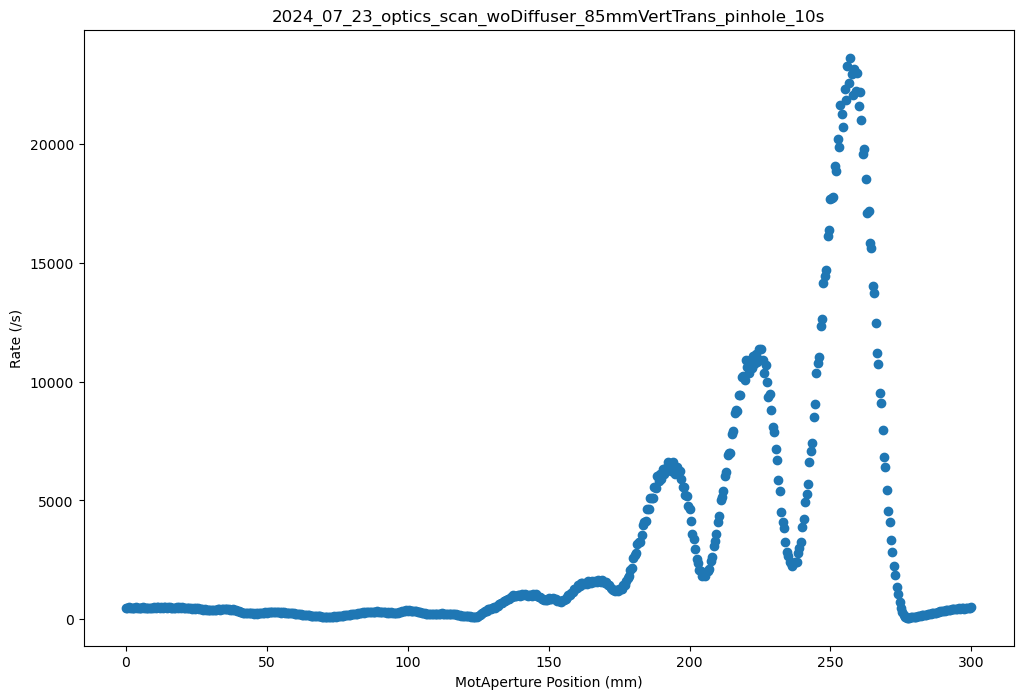

In [112]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
x_label = 'MotAperture'
y_label = 'Rate'
ax.scatter(meta_df[x_label], meta_df[y_label])  # Plot some data on the Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['Rate'])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
plt.xlabel("{} Position (mm)".format(x_label))
plt.ylabel("{} (/s)".format(y_label))
plt.title(sample_name)

Text(0.5, 1.0, '2024_07_23_optics_scan_woDiffuser_11mmPinhole_VertTrans_10s')

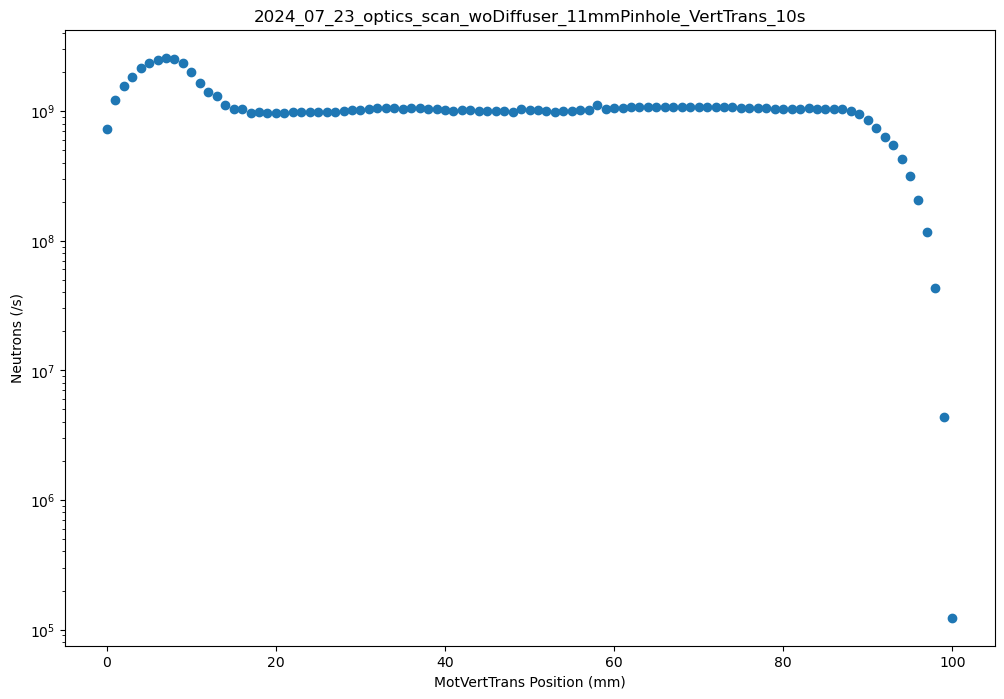

In [124]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
x_label = 'MotVertTrans'
y_label = 'Neutrons'
ax.scatter(meta_df[x_label], meta_df[y_label])  # Plot some data on the Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['Rate'])  # Plot some data on the Axes.
ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
plt.xlabel("{} Position (mm)".format(x_label))
plt.ylabel("{} (/s)".format(y_label))
plt.title(sample_name)

In [38]:
meta_df.Rate.max()

24007.8

In [53]:
meta_df['MotAperture'][meta_df['Rate']==meta_df.Rate.max()]

scan00_all_260.000_0060_4539.tiff    260.0
Name: MotAperture, dtype: float64

In [39]:
meta_df['MotAperture'][meta_df['Rate']==24007.8]

scan00_257.500_0010_0933.tiff    257.5
Name: MotAperture, dtype: float64

Text(0.5, 1.0, 'Pinhole aperture scan (fixed BN mask)')

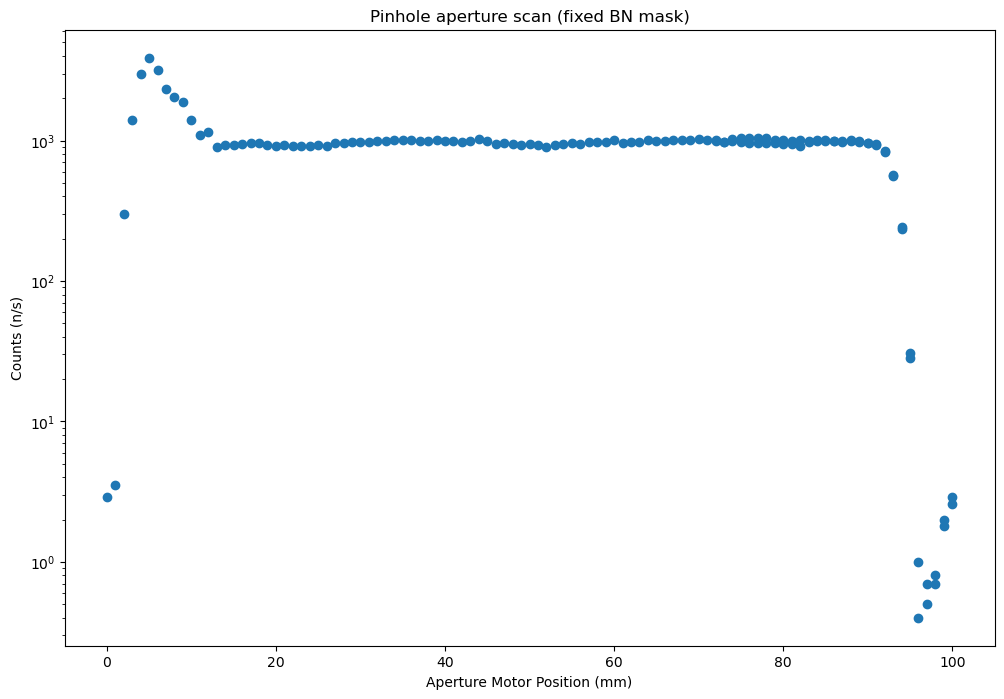

In [22]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['MotVertTrans'], meta_df['Rate'])  # Plot some data on the Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['Rate'])  # Plot some data on the Axes.
ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
plt.xlabel("Aperture Motor Position (mm)")
plt.ylabel("Counts (n/s)")
plt.title("Pinhole aperture scan (fixed BN mask)")

Text(0.5, 1.0, 'Pinhole with BN mask scan')

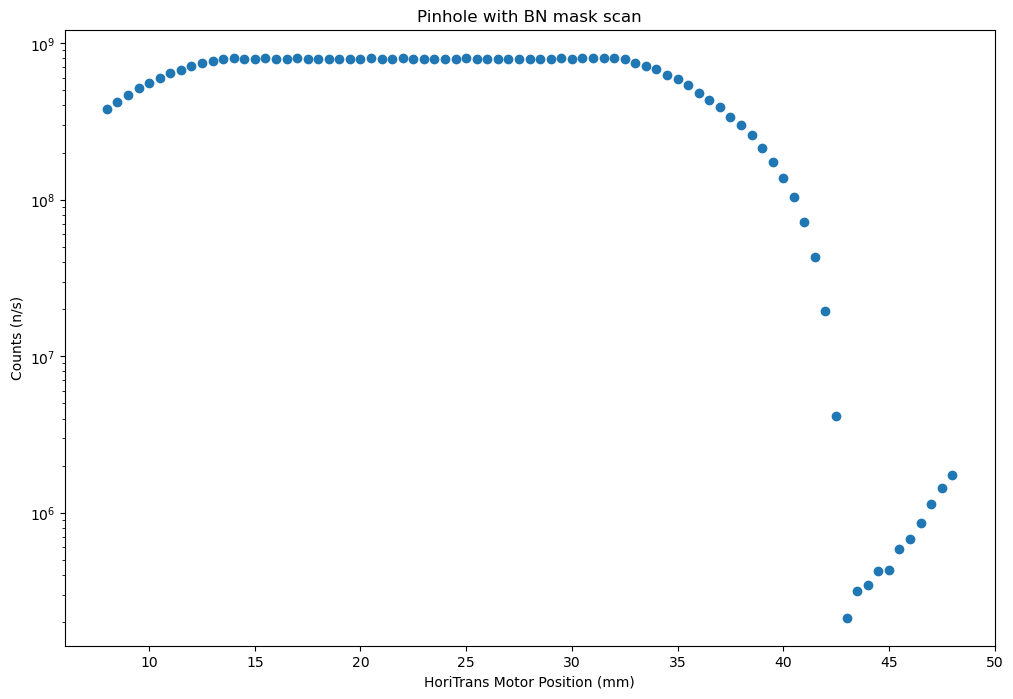

In [32]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['MotHoriTrans'], meta_df['Neutrons'])  # Plot some data on the Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['Rate'])  # Plot some data on the Axes.
ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
plt.xlabel("HoriTrans Motor Position (mm)")
plt.ylabel("Counts (n/s)")
plt.title("Pinhole with BN mask scan")

Text(0.5, 1.0, 'Pinhole with BN mask scan')

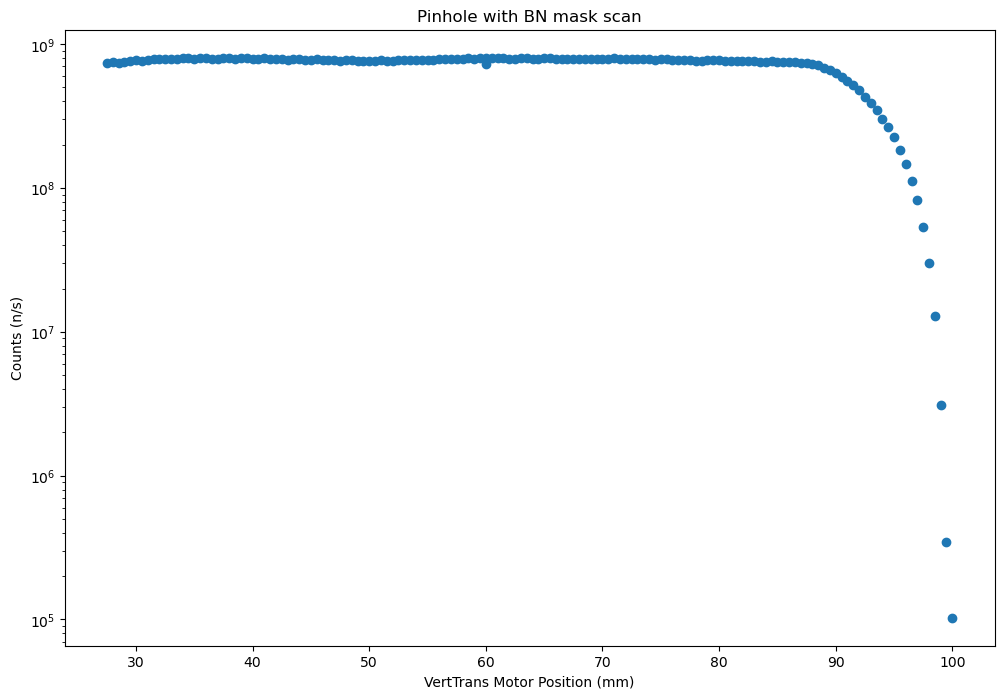

In [15]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['MotVertTrans'], meta_df['Neutrons'])  # Plot some data on the Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['Rate'])  # Plot some data on the Axes.
ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
plt.xlabel("VertTrans Motor Position (mm)")
plt.ylabel("Counts (n/s)")
plt.title("Pinhole with BN mask scan")

Text(0.5, 1.0, 'BN mask HoriTrans scan (fixed pinhole)')

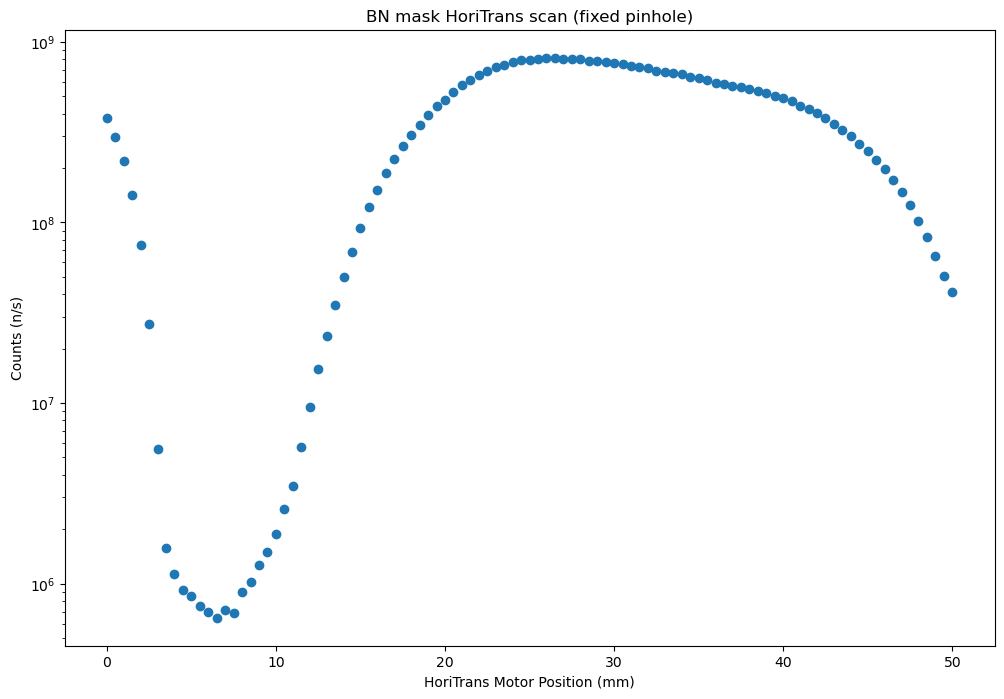

In [10]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['MotHoriTrans'], meta_df['Neutrons'])  # Plot some data on the Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['Rate'])  # Plot some data on the Axes.
ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
plt.xlabel("HoriTrans Motor Position (mm)")
plt.ylabel("Counts (n/s)")
plt.title("BN mask HoriTrans scan (fixed pinhole)")

In [90]:
pprint(meta_dict)

{'scan00_all_108.500_0060_4842.tiff': {'BMCounter': 12257.0,
                                       'BMCounterRate': 224.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 108.5},
 'scan00_all_109.000_0060_4841.tiff': {'BMCounter': 11890.0,
                                       'BMCounterRate': 218.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 109.0},
 'scan00_all_109.500_0060_4840.tiff': {'BMCounter': 11846.0,
                                       'BMCounterRate': 222.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 109.5},
 'scan00_all_110.000_0060_4839.tiff': {'BMCounter': 12400.0,
                                       'BMCounterRate': 197.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 110.0},
 'scan00_all

 'scan00_all_257.500_0060_4544.tiff': {'BMCounter': 1016458.0,
                                       'BMCounterRate': 16519.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 257.5},
 'scan00_all_258.000_0060_4543.tiff': {'BMCounter': 1035222.0,
                                       'BMCounterRate': 16560.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 258.0},
 'scan00_all_258.500_0060_4542.tiff': {'BMCounter': 1034672.0,
                                       'BMCounterRate': 16706.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 258.5},
 'scan00_all_259.000_0060_4541.tiff': {'BMCounter': 1053252.0,
                                       'BMCounterRate': 16775.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 259.

In [10]:
meta_df

,ExposureTime,MotHoriTrans,MotVertTrans,MotAperture,BMCounter,BMCounterRate,Rate,Neutrons
scan00_all_108.500_0060_4842.tiff,60.0,28.0,60.0,108.5,12257.0,224.0,204.283333,1.937866e+07
scan00_all_109.000_0060_4841.tiff,60.0,28.0,60.0,109.0,11890.0,218.0,198.166667,1.879842e+07
scan00_all_109.500_0060_4840.tiff,60.0,28.0,60.0,109.5,11846.0,222.0,197.433333,1.872885e+07
scan00_all_110.000_0060_4839.tiff,60.0,28.0,60.0,110.0,12400.0,197.0,206.666667,1.960474e+07
scan00_all_110.500_0060_4838.tiff,60.0,28.0,60.0,110.5,12131.0,191.0,202.183333,1.917945e+07
...,...,...,...,...,...,...,...,...
scan02_smalls_208.000_0120_4850.tiff,120.0,28.0,60.0,208.0,307328.0,2485.0,2561.066667,2.429470e+08
scan02_smalls_208.500_0120_4849.tiff,120.0,28.0,60.0,208.5,338766.0,2765.0,2823.050000,2.677992e+08
scan02_smalls_209.000_0120_4848.tiff,120.0,28.0,60.0,209.0,371347.0,3153.0,3094.558333,2.935549e+08
scan02_smalls_209.500_0120_4847.tiff,120.0,28.0,60.0,209.5,401520.0,3390.0,3346.000000,3.174071e+08


In [75]:
# for each in meta_dict.keys():
#     _dia = each.split('_')[1]
#     _dia = float(_dia.replace('mm', ''))
#     meta_dict[each]['Aperture_dia_mm'] = _dia

In [81]:
# meta_df['Area'] = 3.14159265 * (meta_df['Aperture_dia_mm']/2)**2

In [82]:
# meta_df['Neutrons_per_area'] = meta_df['Neutrons']/meta_df['Area']

Text(0, 0.5, 'Flux (n/s)')

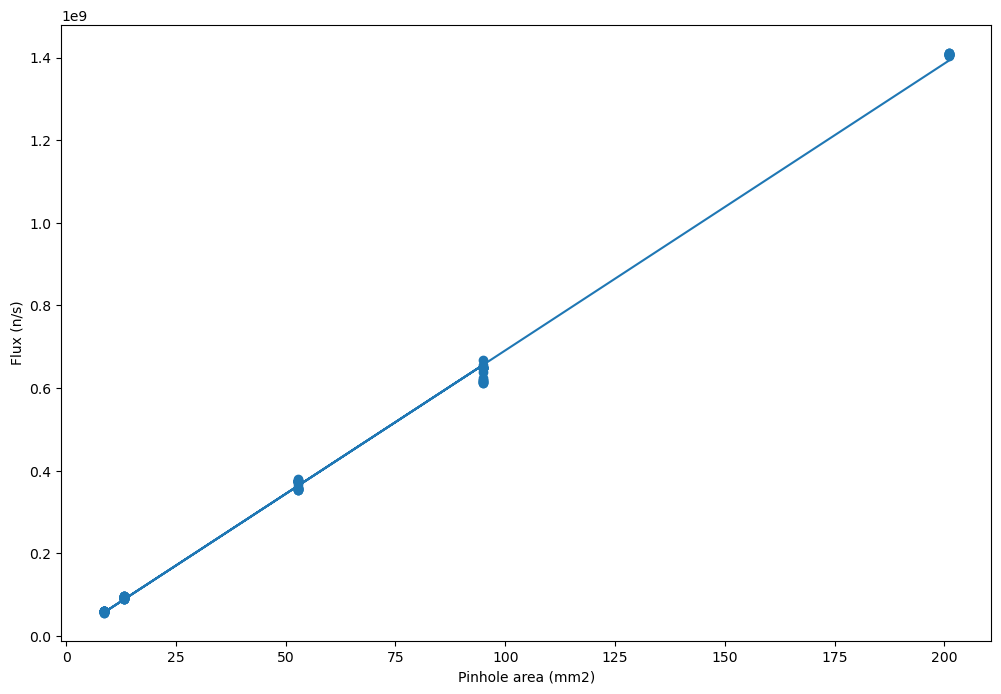

In [33]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['Area'], meta_df['Neutrons'])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
#calculate equation for trendline
z = np.polyfit(meta_df['Area'], meta_df['Neutrons'], 1)
p = np.poly1d(z)
#add trendline to plot
plt.plot(meta_df['Area'], p(meta_df['Area']))
plt.xlabel("Pinhole area (mm2)")
plt.ylabel("Flux (n/s)")

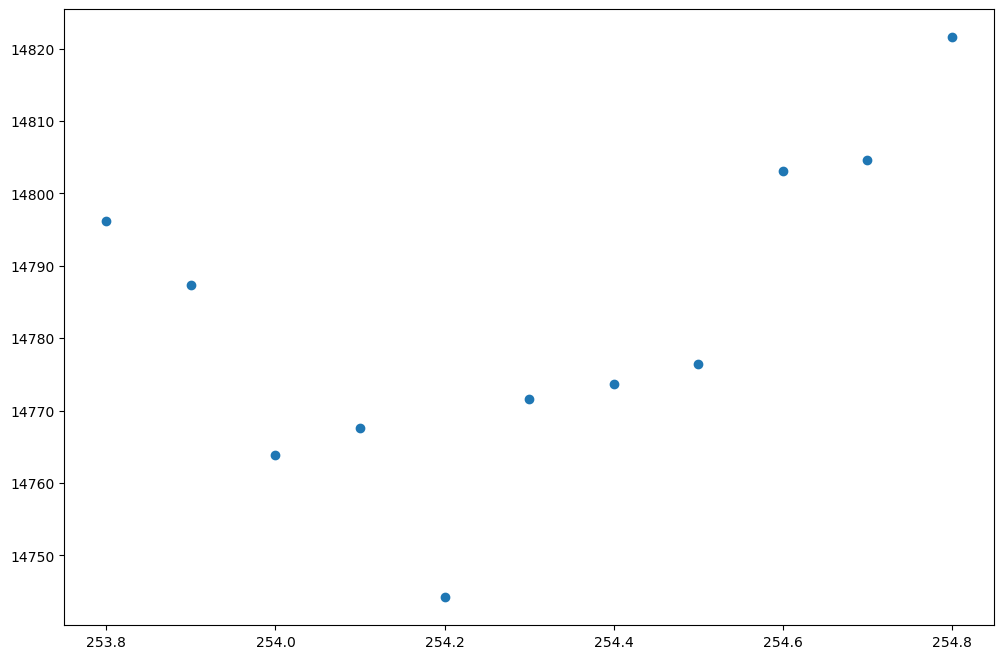

In [34]:
pinhole_size = [16, 11, 8.2, 4.1, 3.3]
pinhole_size = 16
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['MotAperture'][meta_df['Aperture_dia_mm']==pinhole_size], meta_df['Rate'][meta_df['Aperture_dia_mm']==pinhole_size])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   

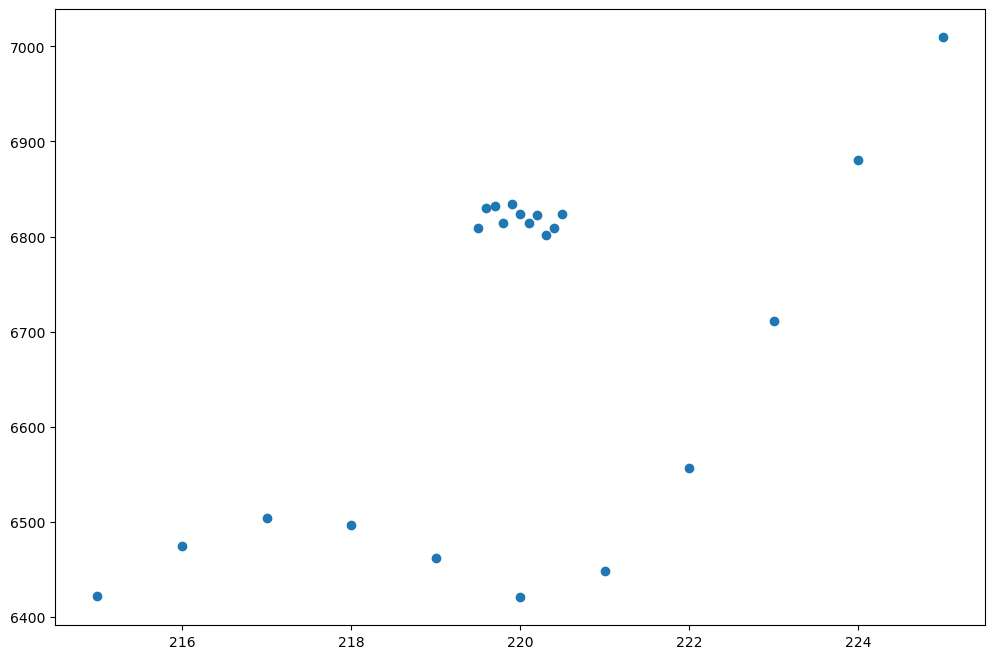

In [35]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
pinhole_size = 11
ax.scatter(meta_df['MotAperture'][meta_df['Aperture_dia_mm']==pinhole_size], meta_df['Rate'][meta_df['Aperture_dia_mm']==pinhole_size])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   

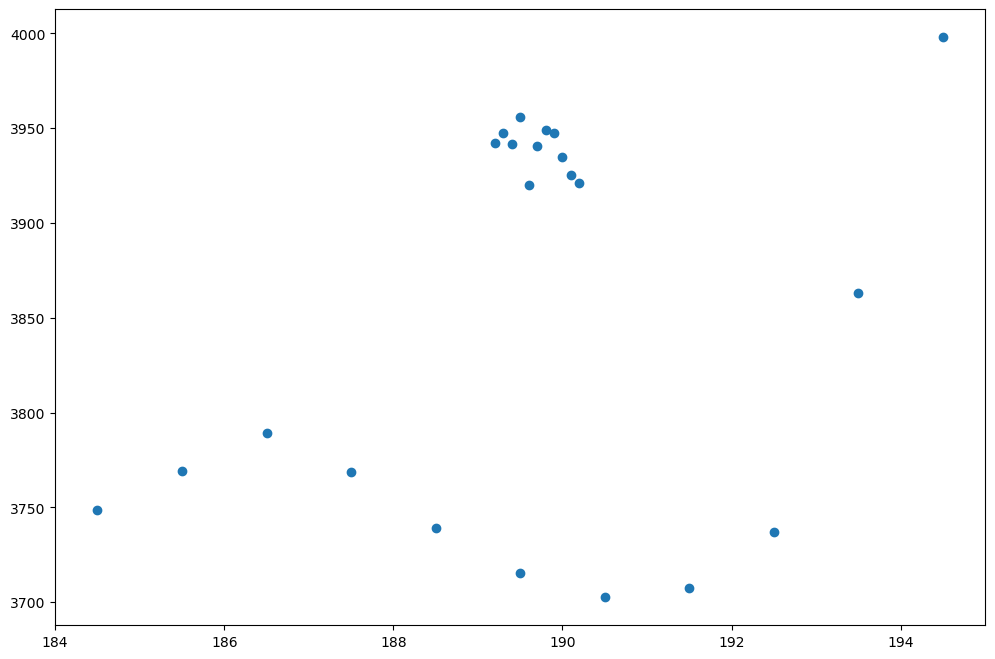

In [36]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
pinhole_size = 8.2
ax.scatter(meta_df['MotAperture'][meta_df['Aperture_dia_mm']==pinhole_size], meta_df['Rate'][meta_df['Aperture_dia_mm']==pinhole_size])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   

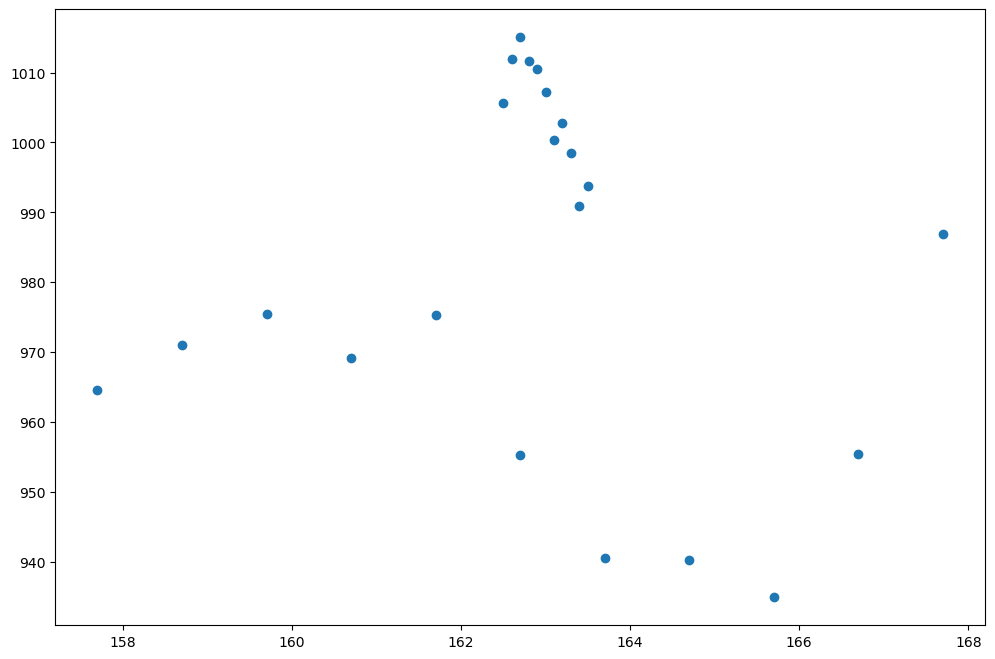

In [37]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
pinhole_size = 4.1
ax.scatter(meta_df['MotAperture'][meta_df['Aperture_dia_mm']==pinhole_size], meta_df['Rate'][meta_df['Aperture_dia_mm']==pinhole_size])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   

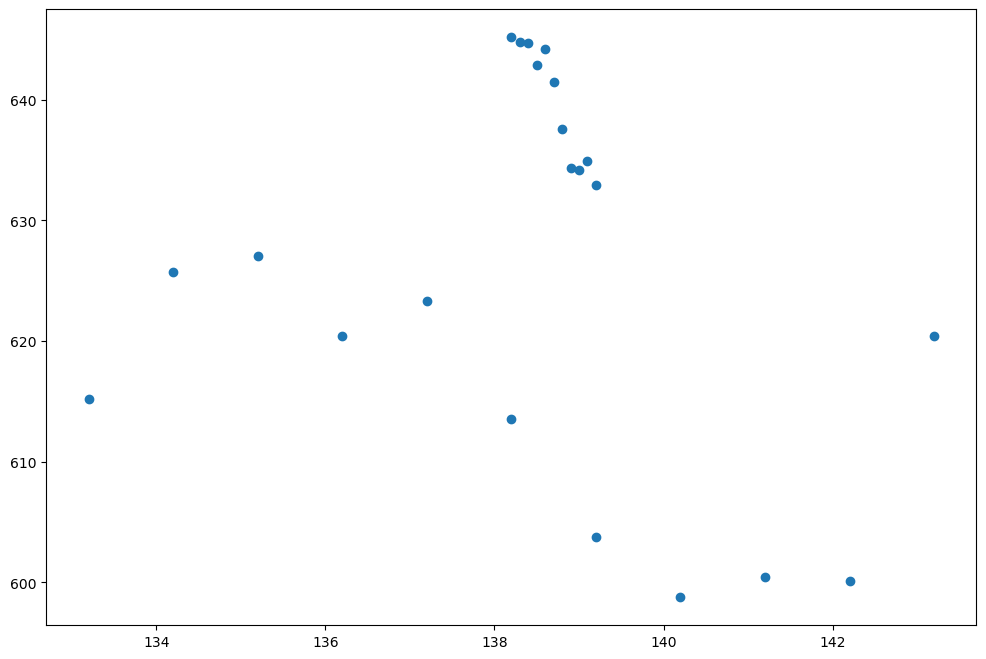

In [38]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
pinhole_size = 3.3
ax.scatter(meta_df['MotAperture'][meta_df['Aperture_dia_mm']==pinhole_size], meta_df['Rate'][meta_df['Aperture_dia_mm']==pinhole_size])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   

In [12]:
meta_df.to_csv('Pinhole_scan')

In [11]:
meta_df.to_clipboard()